In [1]:
import numpy as np
import pandas as pd
import pickle
import torch.nn as nn
from torch.utils.data import DataLoader
import json, ast, sys, csv, random
import plotly.express as px
import math
import datetime
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#Implement training process
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error
csv.field_size_limit(sys.maxsize)
URL = "/media/data/ccarmona/memoria/dataset/rl_csvs/"
from matplotlib import rcParams
plt.rcParams.update({'font.size': 15})

In [2]:
model_name = 'Model_Adam'

In [3]:
def open_files_final(model_name, epsilon):
    nombre_compuesto = model_name + str(epsilon) + "_"
    neo_df_final = pd.read_csv(URL + "neo_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    ql_df_final = pd.read_csv(URL + "ql_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_final = pd.read_csv(URL + "sarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_final = pd.read_csv(URL + "exsarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [neo_df_final, ql_df_final, sarsa_df_final, exsarsa_df_final]
def open_files_iter(model_name, epsilon):
    nombre_compuesto = model_name + str(epsilon) + "_"
    neo_df_iter = pd.read_csv(URL + "neo_df_iteration" + nombre_compuesto +".csv", engine='python', encoding='utf-8')
    ql_df_iter = pd.read_csv(URL + "ql_df_iteration" + nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_iter = pd.read_csv(URL + "sarsa_df_iteration"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_iter = pd.read_csv(URL + "exsarsa_df_iteration"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [neo_df_iter, ql_df_iter, sarsa_df_iter, exsarsa_df_iter]
def comma(num):
    num = str(num).replace(".",",")
    return num

In [4]:
model_025= open_files_final(model_name,0.25) ## epsilon 0.25
model_05 = open_files_final(model_name,0.5) ## epsilon 0.5
model_075 = open_files_final(model_name,0.75) ## epsilon 0.75
model_09 = open_files_final(model_name,0.9) ## epsilon 0.9

model_025_iter= open_files_iter(model_name,0.25) ## epsilon 0.25 por iteracion
model_05_iter = open_files_iter(model_name,0.5) ## epsilon 0.5 por iteracion
model_075_iter = open_files_iter(model_name,0.75) ## epsilon 0.75 por iteracion
model_09_iter = open_files_iter(model_name,0.9) ## epsilon 0.9 por iteracion

In [5]:
np.mean(model_075[0]['pred_new'])

66.83066250395775

In [6]:
np.mean(model_09[0]['pred_new'])

69.5382462632656

In [7]:
matplotlib.rc('text', usetex = False)

### Latencia promedio de cada algoritmo + promedio real por  lr

In [8]:
def Valores_Promedio(df):
    real_value = [np.mean(df[0]['real_new']) for i in range(len(df))]
    old_pred = [np.mean(df[0]['pred_old']) for i in range(len(df))]
    h = [
        np.mean(df[0]['pred_new']), # NEO
        np.mean(df[1]['pred_new']), # QL
        np.mean(df[2]['pred_new']), # SARSA
        np.mean(df[3]['pred_new']), # EXSARSA
    ]
    return h, real_value, old_pred
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.75*height,
                comma(round(float(height),2)),
                ha='center', va='bottom')

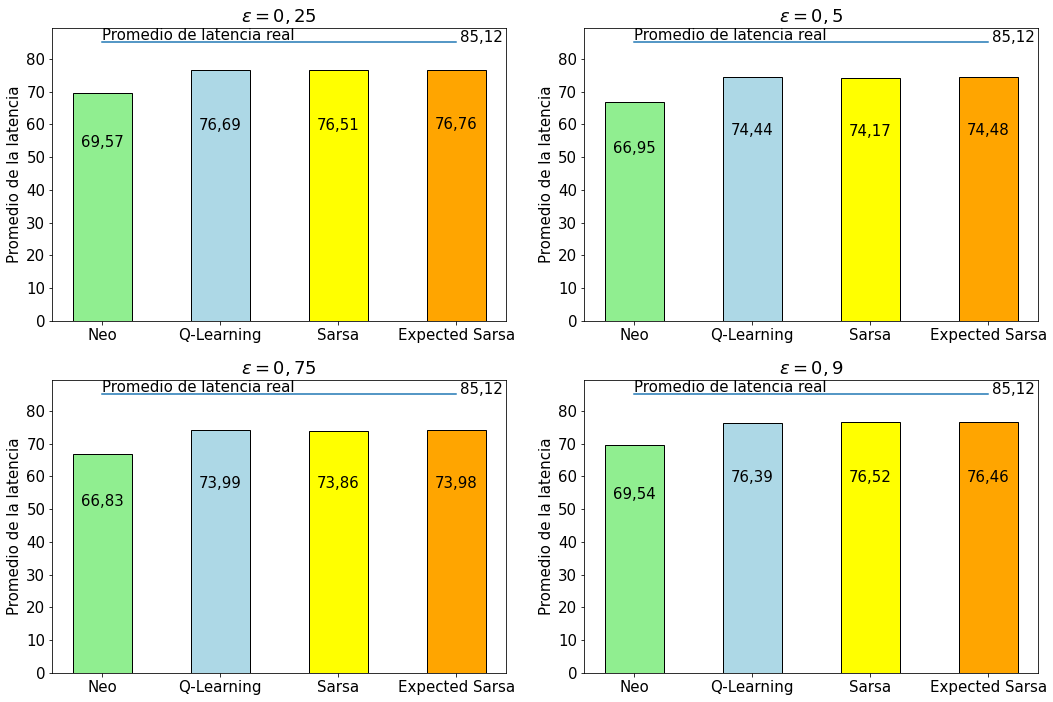

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
width = 0.15
ind = np.arange(4)*width*2
c = ['lightgreen','lightblue','yellow','orange']
names = ('Neo','Q-Learning','Sarsa','Expected Sarsa')


h1, real_value1, old_pred1  = Valores_Promedio(model_025)
rects1 = ax1.bar(ind, h1, width, color=c, edgecolor = 'black',align='center')
line11 = ax1.plot(ind, real_value1);
#line22 = ax1.plot(ind, old_pred1);
ax1.text(ind[0],real_value1[0] + 0.55,'Promedio de latencia real')
#ax1.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax1.text(ind[3]+0.01,real_value1[0] - 0.1,comma(round(real_value1[0],2)))
#ax1.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax1.set_xticks(ind)
ax1.set_xticklabels(names)
autolabel(rects1,ax1)
ax1.title.set_text(r'$\varepsilon=0,25$')
ax1.set_ylabel('Promedio de la latencia')

h2, real_value2, old_pred2  = Valores_Promedio(model_05)
rects2 = ax2.bar(ind, h2, width, color=c, edgecolor = 'black',align='center')
line22 = ax2.plot(ind, real_value1);
#line22 = ax2.plot(ind, old_pred1);
ax2.text(ind[0],real_value2[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax2.text(ind[3]+0.01,real_value2[0] - 0.1,comma(round(real_value2[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax2.set_xticks(ind)
ax2.set_xticklabels(names)
autolabel(rects2,ax2)
ax2.title.set_text(r'$\varepsilon=0,5$')
ax2.set_ylabel('Promedio de la latencia')

h3, real_value3, old_pred3  = Valores_Promedio(model_075)
rects3 = ax3.bar(ind, h3, width, color=c, edgecolor = 'black',align='center')
line33 = ax3.plot(ind, real_value1);
#line22 = ax2.plot(ind, old_pred1);
ax3.text(ind[0],real_value3[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax3.text(ind[3]+0.01,real_value3[0] - 0.1,comma(round(real_value3[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax3.set_xticks(ind)
ax3.set_xticklabels(names)
autolabel(rects3,ax3)
ax3.title.set_text(r'$\varepsilon=0,75$')
ax3.set_ylabel('Promedio de la latencia')

h4, real_value4, old_pred4  = Valores_Promedio(model_09)
rects4 = ax4.bar(ind, h4, width, color=c, edgecolor = 'black',align='center')
line44 = ax4.plot(ind, real_value4);
#line22 = ax2.plot(ind, old_pred1);
ax4.text(ind[0],real_value4[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax4.text(ind[3]+0.01,real_value4[0] - 0.1,comma(round(real_value4[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax4.set_xticks(ind)
ax4.set_xticklabels(names)
autolabel(rects4,ax4)
ax4.title.set_text(r'$\varepsilon=0,9$')
ax4.set_ylabel('Promedio de la latencia')

fig.show()
fig.tight_layout()
plt.savefig("RL_EPSILON_promedio_latencia.pdf")

### Latencia promedio por iteración de  cada consulta para cada algoritmo + promedio real

In [10]:
def PromedioPorIteracionFormato(df, num_iter):
    aux_dict = {}
    values_pred = []
    for i in range(num_iter):
        aux_dict[str(i)] = {"index" : 0, "preds" : [], "mean_preds" : []}
    for i in range(len(df)):
        a = [df['index'][i],df['iteration'][i],df['pred_new'][i]]
        aux_dict[str(a[1])]["index"] = a[0]
        aux_dict[str(a[1])]["preds"].append(float(a[2]))
    for k,v in aux_dict.items():
        aux_dict[k]["mean_preds"] = np.mean(aux_dict[k]["preds"])
        values_pred.append(np.mean(aux_dict[k]["preds"]))
    index_list = [int(x) for x in list(aux_dict.keys())]
    return index_list, values_pred
def PromedioPorIteracion(df):
    index_list, values_pred = PromedioPorIteracionFormato(df)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(index_list, values_pred);

In [11]:
index_list_neo_025, values_pred_neo_025 = PromedioPorIteracionFormato(model_025_iter[0],200)
index_list_ql_025, values_pred_ql_025 = PromedioPorIteracionFormato(model_025_iter[1],200)
index_list_sarsa_025, values_pred_sarsa_025 = PromedioPorIteracionFormato(model_025_iter[2],200)
index_list_exsarsa_025, values_pred_exsarsa_025 = PromedioPorIteracionFormato(model_025_iter[3],200)

index_list_neo_05, values_pred_neo_05 = PromedioPorIteracionFormato(model_05_iter[0],200)
index_list_ql_05, values_pred_ql_05 = PromedioPorIteracionFormato(model_05_iter[1],200)
index_list_sarsa_05, values_pred_sarsa_05 = PromedioPorIteracionFormato(model_05_iter[2],200)
index_list_exsarsa_05, values_pred_exsarsa_05 = PromedioPorIteracionFormato(model_05_iter[3],200)

index_list_neo_075, values_pred_neo_075 = PromedioPorIteracionFormato(model_075_iter[0],200)
index_list_ql_075, values_pred_ql_075 = PromedioPorIteracionFormato(model_075_iter[1],200)
index_list_sarsa_075, values_pred_sarsa_075 = PromedioPorIteracionFormato(model_075_iter[2],200)
index_list_exsarsa_075, values_pred_exsarsa_075 = PromedioPorIteracionFormato(model_075_iter[3],200)

index_list_neo_09, values_pred_neo_09 = PromedioPorIteracionFormato(model_09_iter[0],200)
index_list_ql_09, values_pred_ql_09 = PromedioPorIteracionFormato(model_09_iter[1],200)
index_list_sarsa_09, values_pred_sarsa_09 = PromedioPorIteracionFormato(model_09_iter[2],200)
index_list_exsarsa_09, values_pred_exsarsa_09 = PromedioPorIteracionFormato(model_09_iter[3],200)

In [12]:
real_value = np.ones(len(index_list_neo_025))*np.mean(model_025_iter[0]['real_new'])
old_predict = np.ones(len(index_list_neo_025))*np.mean(model_025_iter[0]['pred_old'])

In [13]:
np.mean(model_025_iter[0]['real_new'])

85.118

In [14]:
np.mean(model_05_iter[0]['real_new'])

85.118

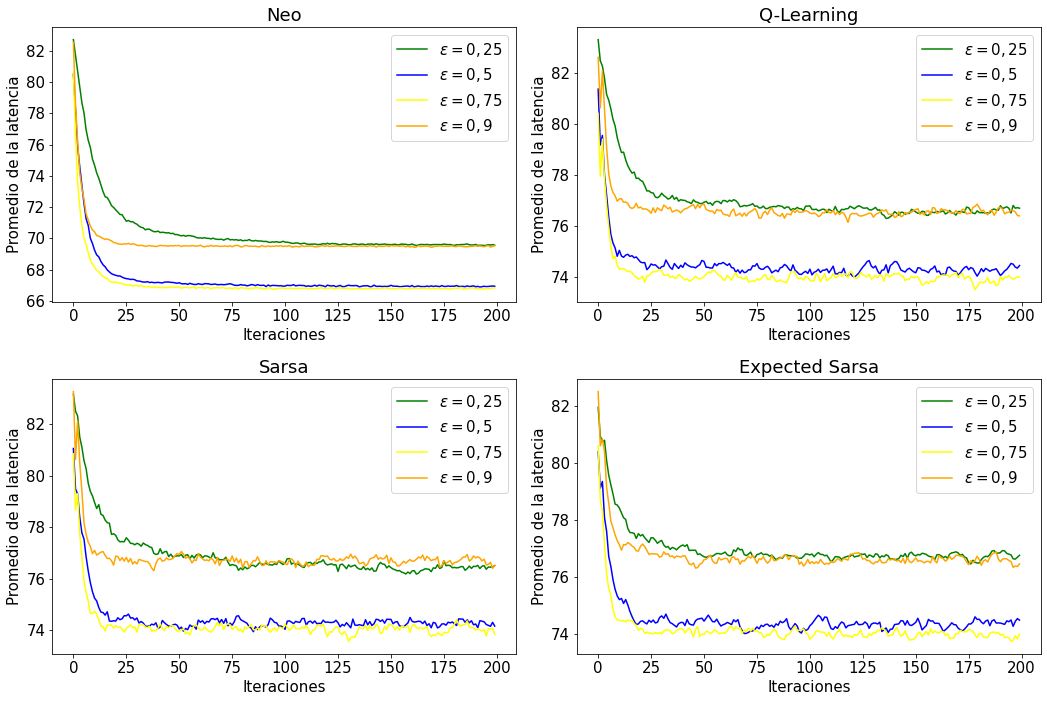

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
#fig.suptitle('Promedio de latencia por iteración para cada algoritmo')
c = ['green','blue','yellow','orange','grey','black']
names = ('Q-Learning','Sarsa','Expected Sarsa')
width = 0.2

ax1.set_title('Neo')
ax1.plot(index_list_neo_025, values_pred_neo_025, color=c[0], label = r'$\varepsilon=0,25$')
ax1.plot(index_list_neo_05, values_pred_neo_05, color=c[1], label = r'$\varepsilon=0,5$')
ax1.plot(index_list_neo_075, values_pred_neo_075, color=c[2], label = r'$\varepsilon=0,75$')
ax1.plot(index_list_neo_09, values_pred_neo_09, color=c[3], label = r'$\varepsilon=0,9$')
ax1.set_ylabel('Promedio de la latencia')
ax1.set_xlabel('Iteraciones')
ax1.legend()

ax2.set_title('Q-Learning')
ax2.plot(index_list_ql_025, values_pred_ql_025, color=c[0], label = r'$\varepsilon=0,25$')
ax2.plot(index_list_ql_05, values_pred_ql_05, color=c[1], label = r'$\varepsilon=0,5$')
ax2.plot(index_list_ql_075, values_pred_ql_075, color=c[2], label = r'$\varepsilon=0,75$')
ax2.plot(index_list_ql_09, values_pred_ql_09, color=c[3], label = r'$\varepsilon=0,9$')
ax2.set_ylabel('Promedio de la latencia')
ax2.set_xlabel('Iteraciones')
ax2.legend()


ax3.set_title('Sarsa')
ax3.plot(index_list_sarsa_025, values_pred_sarsa_025, color=c[0], label = r'$\varepsilon=0,25$')
ax3.plot(index_list_sarsa_05, values_pred_sarsa_05, color=c[1], label = r'$\varepsilon=0,5$')
ax3.plot(index_list_sarsa_075, values_pred_sarsa_075, color=c[2], label = r'$\varepsilon=0,75$')
ax3.plot(index_list_sarsa_09, values_pred_sarsa_09, color=c[3], label = r'$\varepsilon=0,9$')
ax3.set_ylabel('Promedio de la latencia')
ax3.set_xlabel('Iteraciones')
ax3.legend()


ax4.set_title('Expected Sarsa')
ax4.plot(index_list_exsarsa_025, values_pred_exsarsa_025, color=c[0], label = r'$\varepsilon=0,25$')
ax4.plot(index_list_exsarsa_05, values_pred_exsarsa_05, color=c[1], label = r'$\varepsilon=0,5$')
ax4.plot(index_list_exsarsa_075, values_pred_exsarsa_075, color=c[2], label = r'$\varepsilon=0,75$')
ax4.plot(index_list_exsarsa_09, values_pred_exsarsa_09, color=c[3], label = r'$\varepsilon=0,9$')
ax4.set_ylabel('Promedio de la latencia')
ax4.set_xlabel('Iteraciones')
ax4.legend()

fig.tight_layout()
plt.savefig("RL_EPSILON_convergencia.pdf")